In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr, normaltest, ttest_ind


In [138]:
df = pd.read_excel("finwellbeing.xlsx")
df = df.set_index('Country or Economy')
df.head()

,Financial Knowledge Score,Financial Behaviour Score,Financial Attitudes Score,Financial Literacy Score,Economy Type
Country or Economy,,,,,
Albania,20.159410,22.994884,13.245693,56.399986,Developing
Brazil,18.557501,30.490000,10.591250,59.638748,Developing
Cambodia,14.531676,23.787230,10.289666,48.608570,Developing
Chile,21.588284,24.488449,10.030941,56.107674,Developing
Costa Rica,20.705128,25.901709,9.867521,56.474358,Developing


In [139]:
# Compute the correlation matrix
correlation_matrix = df.drop(['Economy Type'],axis=1).corr()
print(correlation_matrix)


                           Financial Knowledge Score  \
Financial Knowledge Score                   1.000000   
Financial Behaviour Score                   0.138143   
Financial Attitudes Score                   0.321436   
Financial Literacy Score                    0.741831   

                           Financial Behaviour Score  \
Financial Knowledge Score                   0.138143   
Financial Behaviour Score                   1.000000   
Financial Attitudes Score                   0.314430   
Financial Literacy Score                    0.726173   

                           Financial Attitudes Score  Financial Literacy Score  
Financial Knowledge Score                   0.321436                  0.741831  
Financial Behaviour Score                   0.314430                  0.726173  
Financial Attitudes Score                   1.000000                  0.618996  
Financial Literacy Score                    0.618996                  1.000000  


<Axes: title={'center': 'Histogram of Financial Knowledge Score'}, ylabel='Frequency'>

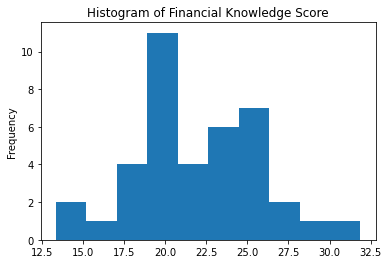

In [140]:
#See if the distribution is Normal
df['Financial Knowledge Score'].plot(kind='hist', title='Histogram of Financial Knowledge Score')


In [141]:
# Assuming 'data' is your dataset in a pandas DataFrame
# Replace 'data' with your actual dataset variable

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data to normalize it
normalized_data = scaler.fit_transform(df.drop('Economy Type',axis=1))

# Convert the normalized data back to a pandas DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=df.drop('Economy Type',axis=1).columns)

In [142]:
# Fit Linear Regression Model
def scatter_plot(normalized_df,factor):
    X = normalized_df[[factor]]
    y = normalized_df['Financial Behaviour Score']

    model = LinearRegression()
    model.fit(X, y)

    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', alpha=0.7)
    plt.plot(X, model.predict(X), color='red', linewidth=2)  # Plot the regression line
    plt.title('Scatter Plot with Linear Regression Line')
    plt.xlabel(factor)
    plt.ylabel('Financial Behaviour Score')
    plt.grid(True)
    plt.show()

    # Print the coefficients of the linear regression model
    print('Coefficient:', model.coef_[0])
    print('Intercept:', model.intercept_)
    print(f'{model.coef_[0]}x + {model.intercept_}')


for Developing countries,
Correlation between Financial Behaviour Score and Financial Knowledge Score: -0.12495272680535668, p-value: 1.734091605416133e-05, t-test: 4.996833286770083
Correlation between Financial Behaviour Score and Financial Attitudes Score: 0.4395382434229296, p-value: 1.6749857994718295e-16, t-test: 14.938138513939533
Correlation between Financial Behaviour Score and Financial Literacy Score: 0.7228519035118662, p-value: 4.0796674396051016e-19, t-test: -18.21854804186528

The factor that has the highest correlation with Financial Behaviour Score is:
 ▣ Financial Literacy Score


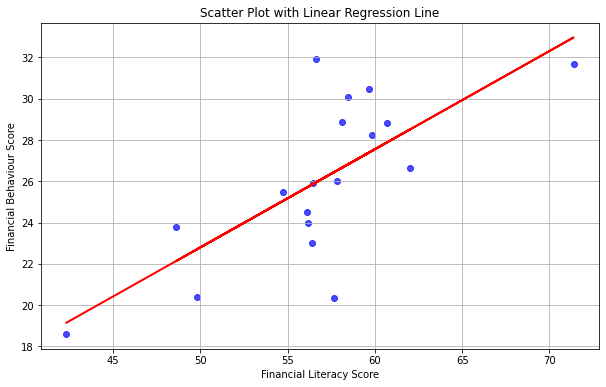

Coefficient: 0.47619446650549785
Intercept: -1.0202017678001951
0.47619446650549785x + -1.0202017678001951


In [143]:

# Calculate the correlation between each factor and Financial Behaviour Score
correlations = {}

EconomicType = ['Developing', 'Developed'][0]
typed_df = df.loc[df['Economy Type']==EconomicType] 

for column in typed_df.drop('Economy Type',axis=1).columns[:]:
    if column != 'Financial Behaviour Score':
        corr, _ = pearsonr(typed_df['Financial Behaviour Score'], typed_df[column])
        t_stat, p_value = ttest_ind(typed_df['Financial Behaviour Score'], typed_df[column])
        correlations[column] = {'correlation': corr, 'p-value': p_value,'t_stat':t_stat}

# Find the factor with the highest correlation
max_corr_factor = max(correlations, key=lambda x: abs(correlations[x]['correlation']))

print(f'for {EconomicType} countries,')

# Output the correlation results and confidence levels
for factor, values in correlations.items():
    print(f"Correlation between Financial Behaviour Score and {factor}: {values['correlation']}, p-value: {values['p-value']}, t-test: {values['t_stat']}")

print(f"\nThe factor that has the highest correlation with Financial Behaviour Score is:\n ▣ {max_corr_factor}")
scatter_plot(typed_df,max_corr_factor)

for Developed countries,
Correlation between Financial Behaviour Score and Financial Knowledge Score: 0.0942550187578039, p-value: 6.401758992284687e-05, t-test: 4.464658246800976
Correlation between Financial Behaviour Score and Financial Attitudes Score: 0.05007105414535357, p-value: 3.29069471712891e-23, t-test: 20.996220088493303
Correlation between Financial Behaviour Score and Financial Literacy Score: 0.6612596997868992, p-value: 1.5479141411415593e-25, t-test: -24.254734857982086

The factor that has the highest correlation with Financial Behaviour Score is:
 ▣ Financial Literacy Score


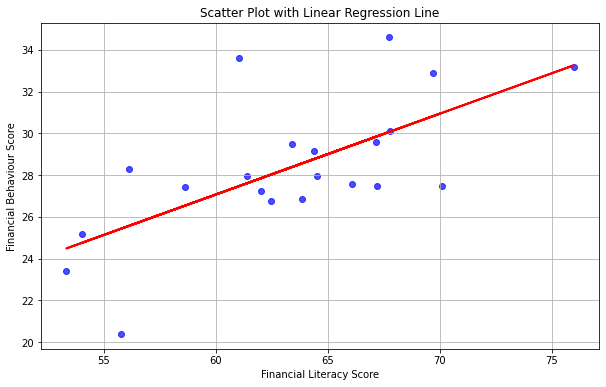

Coefficient: 0.3875683942319014
Intercept: 3.8102749065754686
0.3875683942319014x + 3.8102749065754686


In [144]:

# Calculate the correlation between each factor and Financial Behaviour Score
correlations = {}

EconomicType = ['Developing', 'Developed'][1]
typed_df = df.loc[df['Economy Type']==EconomicType] 

for column in typed_df.drop('Economy Type',axis=1).columns[:]:
    if column != 'Financial Behaviour Score':
        corr, _ = pearsonr(typed_df['Financial Behaviour Score'], typed_df[column])
        t_stat, p_value = ttest_ind(typed_df['Financial Behaviour Score'], typed_df[column])
        correlations[column] = {'correlation': corr, 'p-value': p_value,'t_stat':t_stat}

# Find the factor with the highest correlation
max_corr_factor = max(correlations, key=lambda x: abs(correlations[x]['correlation']))

print(f'for {EconomicType} countries,')

# Output the correlation results and confidence levels
for factor, values in correlations.items():
    print(f"Correlation between Financial Behaviour Score and {factor}: {values['correlation']}, p-value: {values['p-value']}, t-test: {values['t_stat']}")

print(f"\nThe factor that has the highest correlation with Financial Behaviour Score is:\n ▣ {max_corr_factor}")
scatter_plot(typed_df,max_corr_factor)

In [145]:


# Perform the Normal test for each column in the DataFrame
normal_test_results = {}

for column in df.columns:
    statistic, p_value = normaltest(df[column])
    normal_test_results[column] = {'Normal Test Statistic': statistic, 'P-value': p_value}

# Output the Normal test results for each column
for column, results in normal_test_results.items():
    print(f"Column: {column}")
    print(f"Normal Test Statistic: {results['Normal Test Statistic']}")
    print(f"P-value: {results['P-value']*100 :.3f}%")
    if results['P-value'] < 0.05:
        print("The data in this column does not follow a normal distribution.")
    else:
        print("The data in this column follows a normal distribution.")
    print()


c:\Users\JDJ\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:

# Separate the data for Developing and Developed countries
developing_countries_data = df[df['Economy Type'] == 'Developing']
developed_countries_data = df[df['Economy Type'] == 'Developed']

# Calculate the correlation between Literacy Score and Financial Behavioral Score for Developing and Developed countries
developing_corr_literacy, _ = pearsonr(developing_countries_data['Financial Literacy Score'], developing_countries_data['Financial Behaviour Score'])
developed_corr_literacy, _ = pearsonr(developed_countries_data['Financial Literacy Score'], developed_countries_data['Financial Behaviour Score'])

# Perform Normal test to compare the effect of Literacy Score and Economic Status on Financial Behavioral Score
normaltest_literacy_developing = normaltest(developing_countries_data['Financial Literacy Score'])
normaltest_literacy_developed = normaltest(developed_countries_data['Financial Literacy Score'])

# Output the results
print("Correlation between Literacy Score and Financial Behavioral Score for Developing Countries:", developing_corr_literacy)
print("Correlation between Literacy Score and Financial Behavioral Score for Developed Countries:", developed_corr_literacy)
print("Normal Test for Literacy Score in Developing Countries:", normaltest_literacy_developing)
print("Normal Test for Literacy Score in Developed Countries:", normaltest_literacy_developed)


Correlation between Literacy Score and Financial Behavioral Score for Developing Countries: 0.7228519035118662
Correlation between Literacy Score and Financial Behavioral Score for Developed Countries: 0.6612596997868992
Normal Test for Literacy Score in Developing Countries: NormaltestResult(statistic=4.195136790584004, pvalue=0.12275455619820894)
Normal Test for Literacy Score in Developed Countries: NormaltestResult(statistic=0.028943476638708797, pvalue=0.9856324739689759)
